Importing Libraries

In [ ]:

import os
import time
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,max_error,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import xgboost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
train=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
test=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
data=pd.concat([test,train])
print('Dimensions of the Datasets:',data.shape)
data.info()

Dimensions of the Datasets: (3668522, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3668522 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 559.8+ MB


Sample View of Dataset

In [ ]:
data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


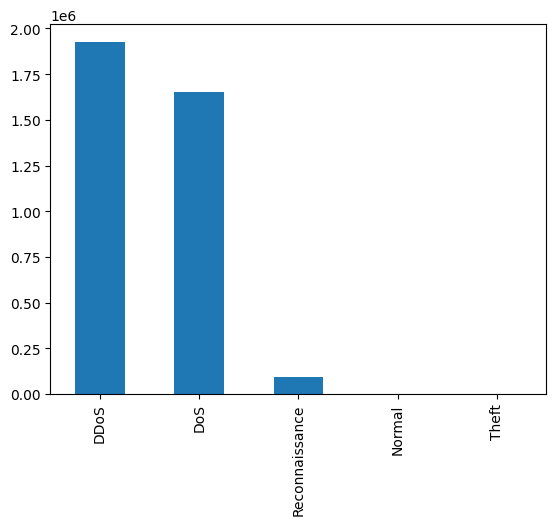

In [ ]:
labels = data["category"].unique()
data["category"].value_counts().plot(kind="bar")
plt.show()

For Train Data:

{'DoS': 0, 'DDoS': 1, 'Reconnaissance': 2, 'Normal': 3, 'Theft': 4}

For Test Data:

{'DoS': 0, 'DDoS': 1, 'Reconnaissance': 2, 'Normal': 3, 'Theft': 4}

 Decision Tree :

Accuracy Score for Classifier = 1.00
F1 Score for Classifier = 1.00
Precison Score for Classifier = 1.00
Recall Score for Classifier = 1.00
Max Error for Classifier = 2.00
Classification Time for Bayesian Classifier = 4.01
Confusion Matrix:


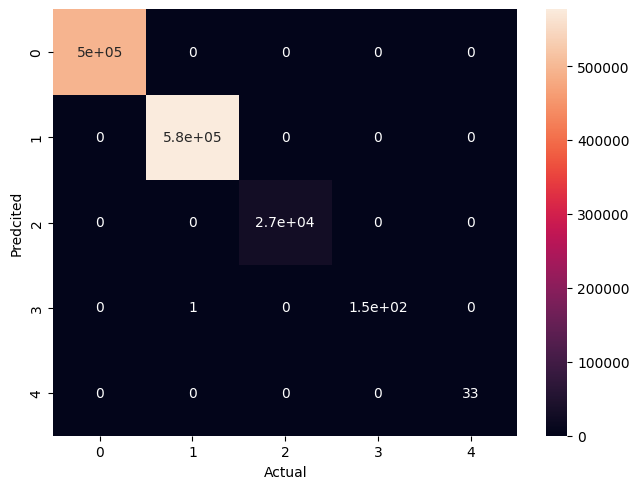


 G_NB :

Accuracy Score for Classifier = 0.97
F1 Score for Classifier = 0.96
Precison Score for Classifier = 0.97
Recall Score for Classifier = 0.97
Max Error for Classifier = 2.00
Classification Time for Bayesian Classifier = 1.50
Confusion Matrix:


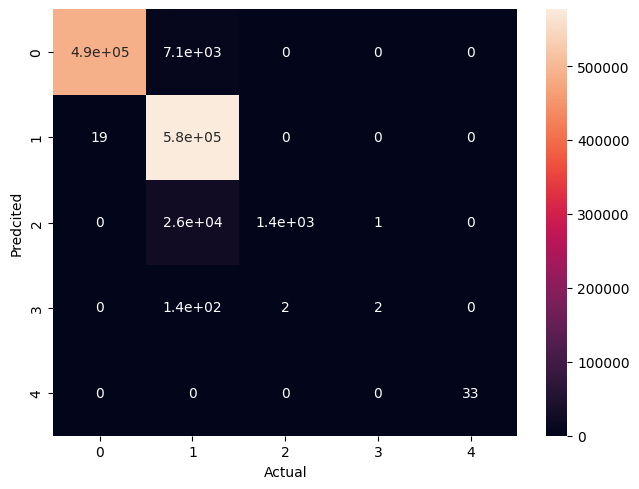


 KNN :

Accuracy Score for Classifier = 1.00
F1 Score for Classifier = 1.00
Precison Score for Classifier = 1.00
Recall Score for Classifier = 1.00
Max Error for Classifier = 2.00
Classification Time for Bayesian Classifier = 61.02
Confusion Matrix:


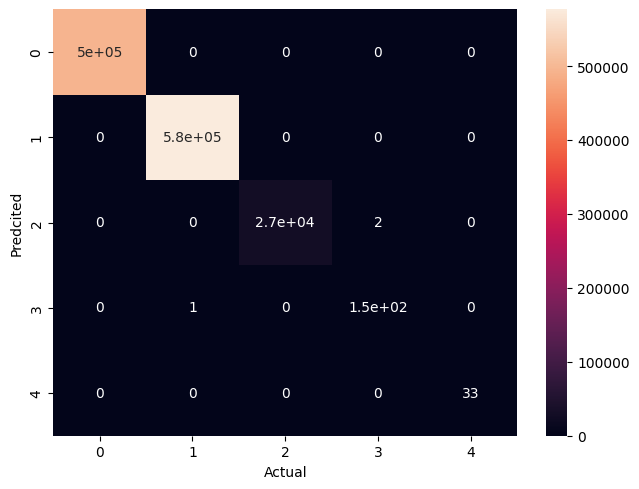


 XGBOOST :

Accuracy Score for Classifier = 1.00
F1 Score for Classifier = 1.00
Precison Score for Classifier = 1.00
Recall Score for Classifier = 1.00
Max Error for Classifier = 2.00
Classification Time for Bayesian Classifier = 53.22
Confusion Matrix:


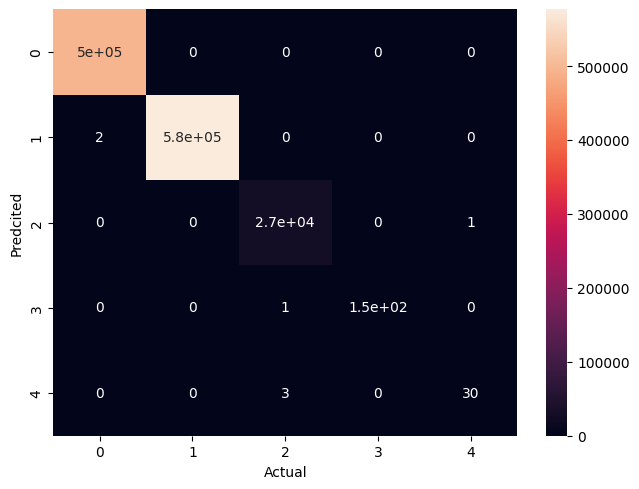

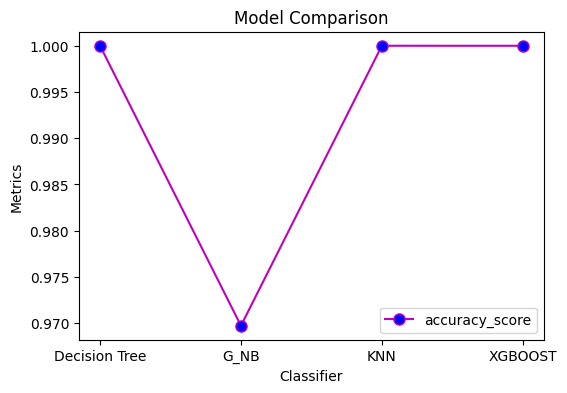

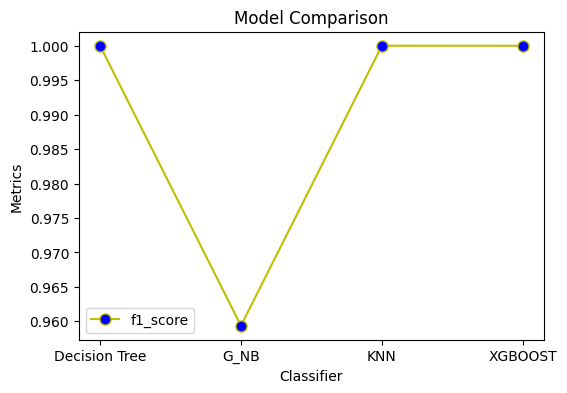

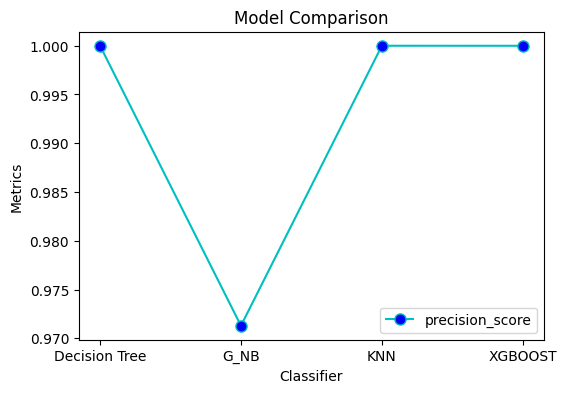

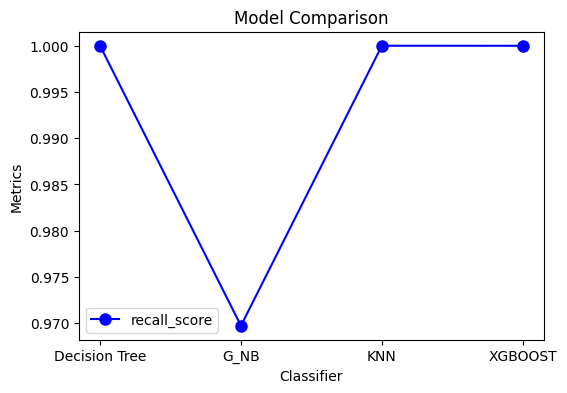

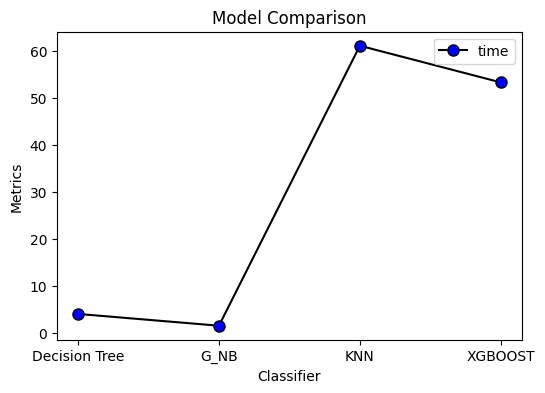

In [ ]:
import time
import ipaddress
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,max_error,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import xgboost
from xgboost import XGBClassifier


import matplotlib.pyplot as plt
import seaborn as sns

def result(lst,accuracy_score,f1_score,precision_score,recall_score,max_error,ti):
    plt.figure(figsize=(6,4))

    plt.plot(lst,accuracy_score,label='accuracy_score',color='m',linestyle = 'solid',marker='o',markerfacecolor='blue',markersize=8)
    plt.xlabel("Classifier")
    plt.ylabel("Metrics")
    plt.title("Model Comparison")
    plt.legend()

    plt.figure(figsize=(6,4))
    plt.plot(lst,f1_score,label='f1_score',color='y',linestyle = 'solid',marker='o',markerfacecolor='blue',markersize=8)
    plt.xlabel("Classifier")
    plt.ylabel("Metrics")
    plt.title("Model Comparison")
    plt.legend()

    plt.figure(figsize=(6,4))
    plt.plot(lst,precision_score,label='precision_score',color='c',linestyle = 'solid',marker='o',markerfacecolor='blue',markersize=8)
    plt.xlabel("Classifier")
    plt.ylabel("Metrics")
    plt.title("Model Comparison")
    plt.legend()

    plt.figure(figsize=(6,4))
    plt.plot(lst,recall_score,label='recall_score',color='b',linestyle = 'solid',marker='o',markerfacecolor='blue',markersize=8)
    plt.xlabel("Classifier")
    plt.ylabel("Metrics")
    plt.title("Model Comparison")
    plt.legend()


    plt.figure(figsize=(6,4))
    plt.plot(lst,ti,label='time',color='k',linestyle = 'solid',marker='o',markerfacecolor='blue',markersize=8)
    plt.xlabel("Classifier")
    plt.ylabel("Metrics")
    plt.title("Model Comparison")
    plt.legend()
    plt.show()

def classification(xtrain,xtest,ytrain,ytest):
    GNBC=GaussianNB()
    DTC=DecisionTreeClassifier()
    XGB=XGBClassifier()
    KNNC=KNeighborsClassifier()
    lst=[DTC,GNBC,KNNC,XGB]
    l1=["Decision Tree","G_NB","KNN","XGBOOST"]
    accuracy_score=[]
    f1_score=[]
    precision_score=[]
    recall_score=[]
    max_error=[]
    ti=[]
    for i in range(4):
        print("\n",l1[i],":")
        ac,f1,ps,rs,me,t=classify(xtrain,xtest,ytrain,ytest,lst[i])
        accuracy_score.append(ac)
        f1_score.append(f1)
        precision_score.append(ps)
        recall_score.append(rs)
        max_error.append(me)
        ti.append(t)

    result(l1,accuracy_score,f1_score,precision_score,recall_score,max_error,ti)

def plot_confusionmatrix(y_train_pred,y_train):
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True)
    plt.tight_layout()
    plt.xlabel("Actual")
    plt.ylabel("Predcited")
    plt.show()

def classify(xtrain,xtest,ytrain,ytest,clf):
    t1=time.time()
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    accuracyscore=accuracy_score(ytest,ypred)
    f1score=f1_score(ytest,ypred,labels=np.unique(ypred),average='weighted',zero_division=1)
    precisionscore=precision_score(ytest,ypred,average='weighted',zero_division=1)
    recallscore=recall_score(ytest,ypred,average='weighted',zero_division=1)
    maxerror=max_error(ytest,ypred)
    ti=time.time()-t1

    print("\nAccuracy Score for Classifier = %.2f"%(accuracyscore))
    print("F1 Score for Classifier = %.2f"%(f1score))
    print("Precison Score for Classifier = %.2f"%(precisionscore))
    print("Recall Score for Classifier = %.2f"%(recallscore))
    print("Max Error for Classifier = %.2f"%(maxerror))
    print("Classification Time for Bayesian Classifier = %.2f"%(ti))
    print("Confusion Matrix:")
    plot_confusionmatrix(ytest,ypred)
    return(accuracyscore,f1score,precisionscore,recallscore,maxerror,ti)

def stddev(arr):
    m=np.mean(arr)
    sumn=0
    for i in arr:
        sumn+=(i-m)*(i-m)
    return np.sqrt(sumn)

def preprocessing(data):
    l=[]
    for i in range(len(data)):
        l.append(i)
    data.index=l
    l1=list(data.unique())
    adict={}
    for i in range(len(l1)):
        adict[l1[i]]=i
    print(adict)
    for i in range(len(data)):
        data[i]=adict[data[i]]
    data=data.astype('int')
    return data
# feature extraction with Extratree classifier
def feature_extraction(xtrain,ytrain,xtest,data):
    ETC=ExtraTreesClassifier()
    ETC=ETC.fit(xtrain,ytrain)
    m=np.mean(ETC.feature_importances_)
    l1=[i for i in ETC.feature_importances_]
    for i in range(len(l1)):
        if(l1[i]<m):
            xtrain=xtrain.drop(labels=data.columns[i],axis=1)
            xtest=xtest.drop(labels=data.columns[i],axis=1)
    return xtrain,xtest

#
def ip_to_int(ip):
    try:
        # Try to convert as IPv4
        return int(ipaddress.IPv4Address(ip))
    except ipaddress.AddressValueError:
        try:
            # Try to convert as IPv6
            return int(ipaddress.IPv6Address(ip))
        except ipaddress.AddressValueError:
            # If neither IPv4 nor IPv6, return a default value or handle accordingly
            return None



def main():
    pd.options.mode.chained_assignment = None
    train=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
    test=pd.read_csv("/content/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
    data=pd.concat([test,train])

    data['sport'] = data['sport'].apply(lambda x: int(x, 0))#Changing the datatype of category 'source_port' from object to integer.
    data['dport'] = data['dport'].apply(lambda x: int(x, 0))#Changing the datatype of category 'destination_port' from object to integer.
    data['saddr'] = data['saddr'].apply(ip_to_int)#Changing the datatype of category 'source_ipaddr' from object to integer.
    data['daddr'] = data['daddr'].apply(ip_to_int)#Changing the datatype of category 'destination_ipaddr' from object to integer.


    #Label Encoding
    categorical_columns=['proto','subcategory']
    data_categorical_values = data[categorical_columns]
    unique_protocol=sorted(data.proto.unique())
    string1 = 'proto_'
    unique_protocol2=[string1 + x for x in unique_protocol]
    unique_service=sorted(data.subcategory.unique())
    string2 = 'subcategory_'
    unique_service2=[string2 + x for x in unique_service]
    dumcols=unique_protocol2 + unique_service2


    #One hot encoding
    data_categorical_values_enc=data_categorical_values.apply(LabelEncoder().fit_transform)
    enc = OneHotEncoder()
    data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
    data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)


    #Joining the onehot encodded categorical data
    newdf=data.join(data_cat_data)
    newdf.drop('proto', axis=1, inplace=True)
    newdf.drop('subcategory', axis=1, inplace=True)



    #Fix the output
    y=newdf['category']
    newdf.drop('category',axis=1,inplace=True)

    xtrain,xtest,ytrain,ytest=train_test_split(newdf,y,test_size=0.3,random_state=101)
    xtrain,xtest=feature_extraction(xtrain,ytrain,xtest,newdf)
    print("For Train Data:\n")
    ytrain=preprocessing(ytrain)
    print("\nFor Test Data:\n")
    ytest=preprocessing(ytest)

    classification(xtrain,xtest,ytrain,ytest)


if __name__=="__main__":
    main()